In [2]:
# 필요한 패키지 import 하기
import os # 환경 변수나 디렉터리, 파일 등의 OS 자원을 제어할 수 있게 해주는 모듈
import cv2 # OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
import matplotlib.pyplot as plt # 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 라이브러리
import numpy as np # 다차원 배열을 쉽게 처리하고 효율적으로 사용할 수 있도록 하는 라이브러리
import dlib # 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능의 라이브러리
import copy

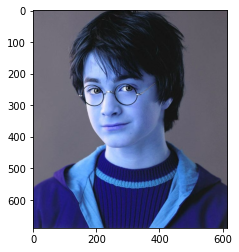

In [3]:
my_image_path = '/aiffel/aiffel/camera_sticker/image_quest3/01.jpg' # 본인 이미지가 있는 경로를 가지고 온다.
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr) # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
plt.show() # 이미지를 출력해준다. (실제 출력)

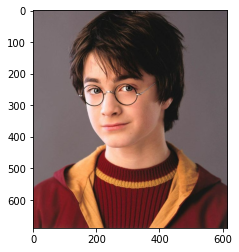

In [4]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) # 이미지 실제 출력하기 위해 이미지를 올려줌 (원하는 사이즈의 픽셀을 원하는 색으로 채워서 만든 그림이라고 합니다.)
plt.show() # 이미지 실제 출력

In [5]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환

In [6]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

rectangles[[(111, 142) (379, 409)]]


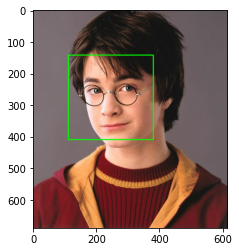

In [7]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [8]:
print(l, t, r, b)

111 142 379 409


In [9]:
model_path = '/aiffel/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
    # 저장한 landmark 모델의 주소를 model_path 변수에 저장
landmark_predictor = dlib.shape_predictor(model_path)
    # dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
    # landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
    # dlib.rectangle: 내부를 예측하는 박스
    # dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄

In [10]:
list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성    

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))

    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list 
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

68


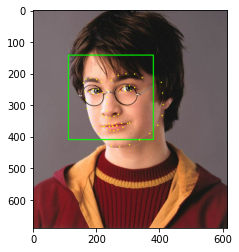

In [11]:
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    # RGB 이미지로 전환
plt.imshow(img_show_rgb)
    # 이미지를 준비
plt.show()
    # 이미지를 출력

In [12]:
# dlib_rects와 list_landmarks 데이터를 엮어 주었음
# dlib_rects : 얼굴 영역을 저장하고 있는 값
# list_landmarks : 68개의 랜드마크 값 저장(이목구비 위치(x,y))

for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[33]) # 코끝의 index
    x = landmark[33][0] #
    y = landmark[33][1] # - dlib_rect.height()//2 # 이미지에서 코 부위의 y값 - 얼굴 영역의 세로를 차지하는 픽셀의 수//2 
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(242, 341)
(x,y) : (242,341)
(w,h) : (269,269)


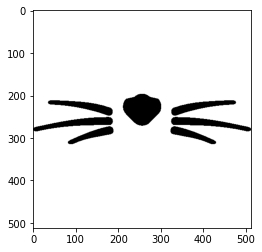

In [13]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/image_quest3/cat-whiskers.png' # 스티커 경로
img_sticker = cv2.imread(sticker_path) # 이미지 경로 읽어온다.
plt.imshow(img_sticker) # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
plt.show()

In [14]:
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(187) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
print (img_sticker.shape) # 사이즈를 조정한 왕관 이미지의 차원 확인

(269, 269, 3)


In [15]:
refined_x = x - w // 2 
refined_y = y - h // 2 
# 원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정합니다. 이미지 시작점은 top-left 좌표이기 때문입니다.
# 즉, refined_x, refined_y값에서 스티커 위치 지정
print (f'(x,y) : ({refined_x},{refined_y})') 

(x,y) : (108,207)


In [16]:
# 스티커 이미지 밖에서 시작하지 않도록 조정이 필요함
# 좌표 순서가 y,x임에 유의한다. (y,x,rgb channel)
# 현재 상황에서는 -y 크기만큼 스티커를 crop 하고, top 의 x좌표와 y 좌표를 각각의 경우에 맞춰 원본 이미지의 경계 값으로 수정하면 아래와 같은 형식으로 나옵니다.
# 음수값 만큼 스티커 이미지를 자른다.
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (108,207)


In [17]:
# sticker_area는 원본이미지에서 스티커를 적용할 위치를 crop한 이미지
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# np.where는 조건에 해당하는 인덱스만 찾아서 값을 적용하는 방법이다.
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker, sticker_area).astype(np.uint8)

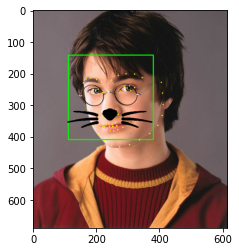

In [18]:
# 얼굴 영역과 랜드마크를 미리 적용해놓은 img_show에 스티커 를 덧붙인 이미지가 나오게 된다.)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

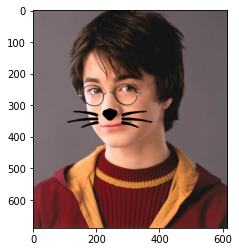

In [19]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker, sticker_area).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) 
plt.show()

### 실험을 위한 모듈화

In [45]:
my_image_path = '/aiffel/aiffel/camera_sticker/image_quest3/01.jpg' # 이미지 경로.

def face_cat_sticker(my_image_path, darkness = 0):
    
    img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
    img_dark = np.ones(img_bgr.shape, dtype = "uint8") * darkness
    img_bgr = cv2.subtract(img_bgr, img_dark)
    img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
    # plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    
    # detector를 선언합니다
    detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환
    dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
    print(dlib_rects)   # 찾은 얼굴 영역 박스 리스트

    for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
        l = dlib_rect.left() # 왼쪽
        t = dlib_rect.top() # 위쪽
        r = dlib_rect.right() # 오른쪽
        b = dlib_rect.bottom() # 아래쪽

        cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

    #img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    #plt.imshow(img_show_rgb)
    #plt.show()

    model_path = '/aiffel/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
    # 저장한 landmark 모델의 주소를 model_path 변수에 저장
    landmark_predictor = dlib.shape_predictor(model_path)
    # dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
    # landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
    # dlib.rectangle: 내부를 예측하는 박스
    # dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄
    
    list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성    

    # 얼굴 영역 박스 마다 face landmark를 찾아냅니다
    # face landmark 좌표를 저장해둡니다
    for dlib_rect in dlib_rects:
        points = landmark_predictor(img_rgb, dlib_rect)
            # 모든 landmark의 위치정보를 points 변수에 저장
        list_points = list(map(lambda p: (p.x, p.y), points.parts()))
            # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
        list_landmarks.append(list_points)
            # list_landmarks에 랜드마크 리스트를 저장

    if len(list_landmarks) > 0:
        print(len(list_landmarks[0]))
    else:
        print("landmark를 못찾았습니다.")

    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list 
    
    for landmark in list_landmarks:
        for point in landmark:
            cv2.circle(img_show, point, 2, (0, 255, 255), -1) # cv2.circle: OpenCV의 원을 그리는 함수


    sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/image_quest3/cat-whiskers.png' # 스티커 이미지 경로
    img_sticker = cv2.imread(sticker_path)
    
    
    for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
        print (landmark[33]) 
        x = landmark[33][0] # 이미지에서 코 부위의 x값
        y = landmark[33][1] # - dlib_rect.height()//2 # 이미지에서 코 부위의 y값 - 얼굴 영역의 세로를 차지하는 픽셀의 수//2 → (437, 182-(186+1//2))
        w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수 (531-345+1) → max(x) - min(x) +1(픽셀의 수 이기 때문에 1을 더해줌 → 픽셀 수는 점 하나로도 1이 됨)
        print (f'(x,y) : ({x},{y})')
        print (f'(w,h) : ({w},{h})')
    
    
        img_sticker_resized = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(187) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
        print (img_sticker_resized.shape)


        refined_x = x - w // 2 
        refined_y = y - h // 2 
        # 원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정합니다. 이미지 시작점은 top-left 좌표이기 때문입니다.
        print (f'(x,y) : ({refined_x},{refined_y})') # 음수 발생 : 이미지 범위를 벗어남을 의미

        # 왕관 이미지가 이미지 밖에서 시작하지 않도록 조정이 필요함
        if refined_x < 0: 
            img_sticker_resized = img_sticker_resized[:, -refined_x:]
            refined_x = 0
        # 왕관 이미지를 씌우기 위해 왕관 이미지가 시작할 y좌표 값 조정
        if refined_y < 0:
            img_sticker_resized = img_sticker_resized[-refined_y:, :] # refined_y가 -98이므로, img_sticker[98: , :]가 된다. (187, 187, 3)에서 (89, 187, 3)이 됨 (187개 중에서 98개가 잘려나감)
            refined_y = 0

        print (f'(x,y) : ({refined_x},{refined_y})')


        # sticker_area는 원본이미지에서 스티커를 적용할 위치를 crop한 이미지 입니다.
        sticker_area = img_show[refined_y:refined_y+img_sticker_resized.shape[0], refined_x:refined_x+img_sticker_resized.shape[1]]
        img_show[refined_y:refined_y+img_sticker_resized.shape[0], refined_x:refined_x+img_sticker_resized.shape[1]] = \
            np.where(img_sticker_resized==0,img_sticker_resized, sticker_area).astype(np.uint8)
        
        # 스티커 이미지를 적용한 이미지를 보여준다.
        sticker_area = img_bgr[refined_y:refined_y +img_sticker_resized.shape[0], refined_x:refined_x+img_sticker_resized.shape[1]]
        img_bgr[refined_y:refined_y+img_sticker_resized.shape[0], refined_x:refined_x+img_sticker_resized.shape[1]] = \
            np.where(img_sticker_resized==0,img_sticker_resized, sticker_area).astype(np.uint8)

    # 스티커 이미지를 적용한 이미지를 보여준다.
    fig, axs = plt.subplots(1,2, figsize = (10, 5))
    plt.subplot(121)
    plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
    
    plt.subplot(122)
    plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) 
    plt.show()

### 밝기에 따른 얼굴 인식 테스트

rectangles[[(111, 142) (379, 409)]]
68
(242, 341)
(x,y) : (242,341)
(w,h) : (269,269)
(269, 269, 3)
(x,y) : (108,207)
(x,y) : (108,207)


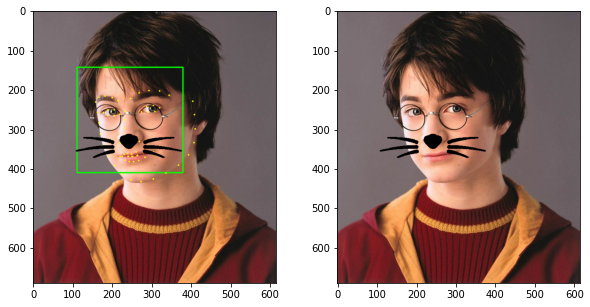

rectangles[[(142, 192) (365, 415)]]
68
(239, 340)
(x,y) : (239,340)
(w,h) : (224,224)
(224, 224, 3)
(x,y) : (127,228)
(x,y) : (127,228)


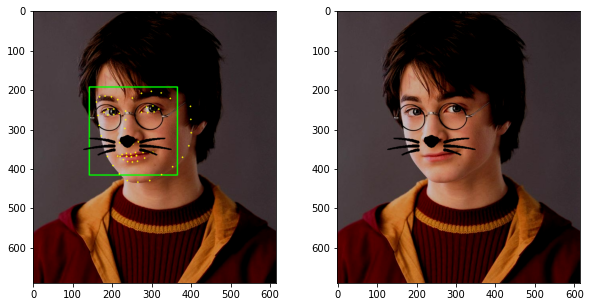

rectangles[[(111, 142) (379, 409)]]
68
(242, 341)
(x,y) : (242,341)
(w,h) : (269,269)
(269, 269, 3)
(x,y) : (108,207)
(x,y) : (108,207)


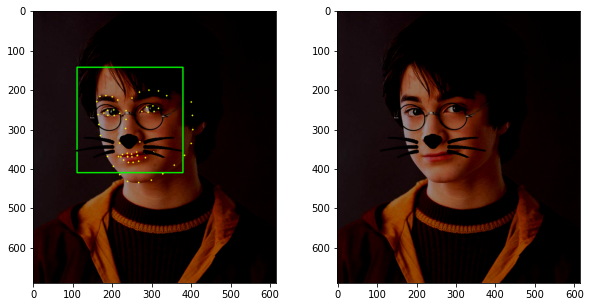

rectangles[[(111, 171) (379, 439)]]
68
(240, 341)
(x,y) : (240,341)
(w,h) : (269,269)
(269, 269, 3)
(x,y) : (106,207)
(x,y) : (106,207)


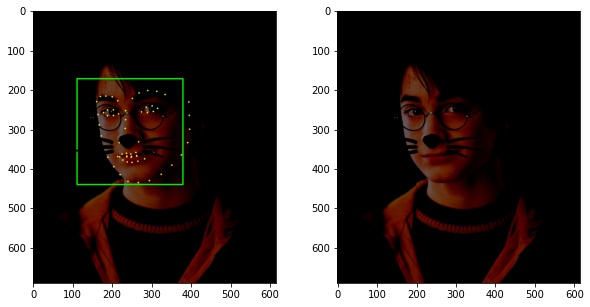

rectangles[[(111, 171) (379, 439)]]
68
(239, 336)
(x,y) : (239,336)
(w,h) : (269,269)
(269, 269, 3)
(x,y) : (105,202)
(x,y) : (105,202)


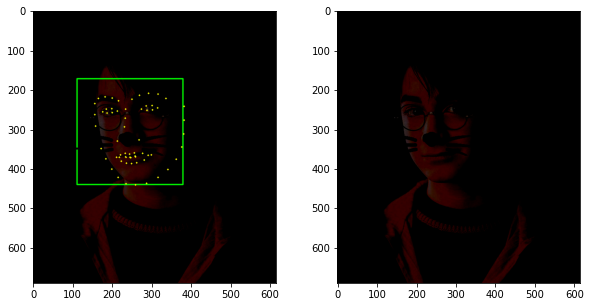

rectangles[]
landmark를 못찾았습니다.


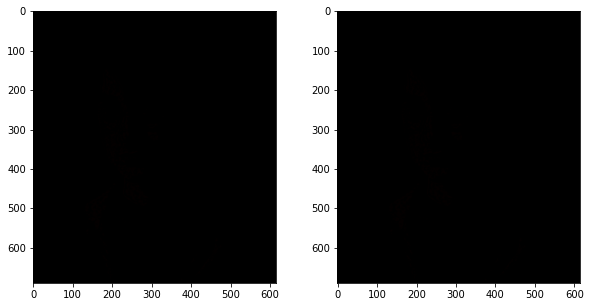

In [47]:
my_image_path = '/aiffel/aiffel/camera_sticker/image_quest3/01.jpg'
for i in range(0, 255, 50):
    face_cat_sticker(my_image_path, i)

### 다양한 이미지에서 얼굴 인식 테스트

rectangles[[(111, 142) (379, 409)]]
68
(242, 341)
(x,y) : (242,341)
(w,h) : (269,269)
(269, 269, 3)
(x,y) : (108,207)
(x,y) : (108,207)


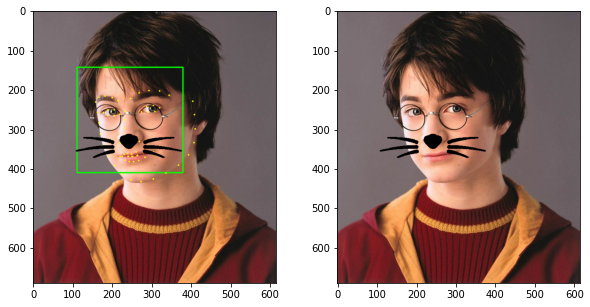

rectangles[[(913, 246) (1375, 708)]]
68
(1120, 529)
(x,y) : (1120,529)
(w,h) : (463,463)
(463, 463, 3)
(x,y) : (889,298)
(x,y) : (889,298)


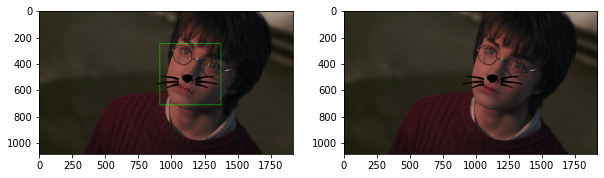

rectangles[[(656, 348) (1118, 811)]]
68
(919, 631)
(x,y) : (919,631)
(w,h) : (463,463)
(463, 463, 3)
(x,y) : (688,400)
(x,y) : (688,400)


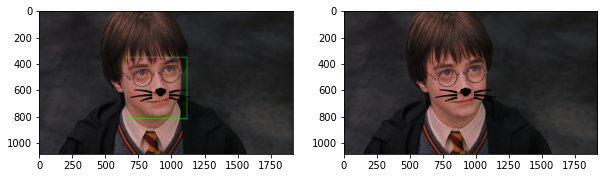

rectangles[[(419, 420) (740, 741)]]
68
(626, 602)
(x,y) : (626,602)
(w,h) : (322,322)
(322, 322, 3)
(x,y) : (465,441)
(x,y) : (465,441)


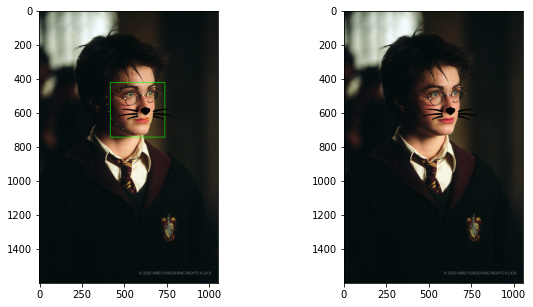

rectangles[[(245, 90) (296, 141)], [(343, 67) (394, 118)], [(152, 101) (204, 153)], [(21, 66) (57, 102)]]
68
(271, 121)
(x,y) : (271,121)
(w,h) : (52,52)
(52, 52, 3)
(x,y) : (245,95)
(x,y) : (245,95)
(366, 96)
(x,y) : (366,96)
(w,h) : (52,52)
(52, 52, 3)
(x,y) : (340,70)
(x,y) : (340,70)
(179, 131)
(x,y) : (179,131)
(w,h) : (53,53)
(53, 53, 3)
(x,y) : (153,105)
(x,y) : (153,105)
(41, 87)
(x,y) : (41,87)
(w,h) : (37,37)
(37, 37, 3)
(x,y) : (23,69)
(x,y) : (23,69)


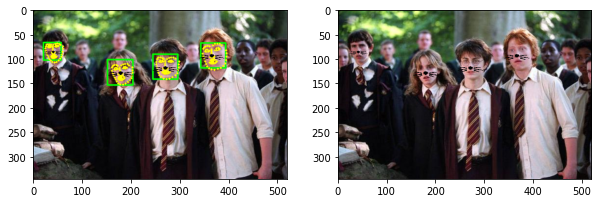

rectangles[]
landmark를 못찾았습니다.


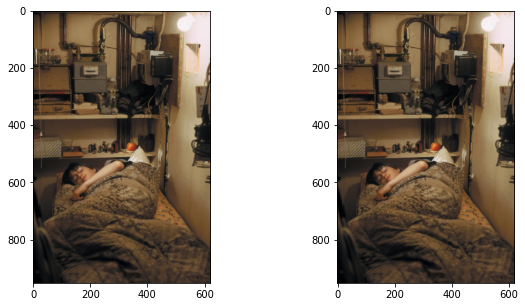

rectangles[]
landmark를 못찾았습니다.


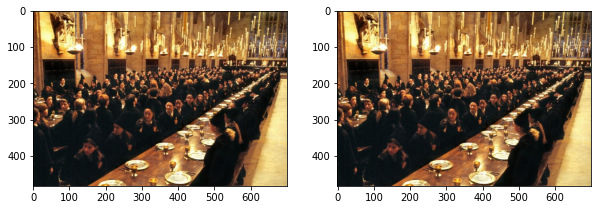

In [40]:
for i in range(1,8):
    my_image_path = f'/aiffel/aiffel/camera_sticker/image_quest3/0{i}.jpg'
    face_cat_sticker(my_image_path)

### 결과
1. 7개의 이미지 중 5개의 이미지에서 landmark를 확인할 수 있었음. 
2. 여러 명이 인식 되어도 landmark가 잘 확인되는 것을 알 수 있었음.
3. 얼굴의 각도에 따라 스티커의 각도가 같이 움직이지 못한 아쉬운 점이 있음.
4. 얼굴 각도, 거리에 따른 얼굴 인식이 안되는 경우가 있어 아쉬운 점이 있음.

### 회고
* 사진에 여러 명이 있어도 다 고양이 수염을 붙일 수 있어서 즐거웠다.
* darkness, 거리, 각도, 여러 사진에 따른 얼굴 인식 여부를 확인하는 즐거운 시간이었다.